In [5]:
from matplotlib import pyplot as plt 
import json 
import numpy as np 
import glob, os , sys, copy

In [8]:
def get_path(root):
    pth = os.path.join(root,  '*.json')
    paths_json = glob.glob(pth)
    return paths_json

In [9]:
print( get_path("../result/SR_leakly0_o1di"))

['../result/SR_leakly0_o1di/result_sr_0p311.json', '../result/SR_leakly0_o1di/result_sr_1p366.json', '../result/SR_leakly0_o1di/result_sr_1p577.json', '../result/SR_leakly0_o1di/result_sr_0p1.json', '../result/SR_leakly0_o1di/result_sr_2p0.json', '../result/SR_leakly0_o1di/result_sr_1p788.json', '../result/SR_leakly0_o1di/result_sr_0p944.json', '../result/SR_leakly0_o1di/result_sr_1p155.json', '../result/SR_leakly0_o1di/result_sr_0p733.json', '../result/SR_leakly0_o1di/result_sr_0p522.json']


In [15]:
def parse_json(path):
    dic = None
    with open(path, 'r') as f:
        try:
            dic = json.load(f)
        except:
            print("No data in json.")
    return dic


In [16]:
# test 
for pa in get_path("../result/SR_leakly0_o1di"):
    print(parse_json(pa))

{'out_path': 'result/SR_leakly0_o1di/result_sr_0p311.json', 'model': 'esn', 'task_type': 'downstream', 'n_folds': 10, 'se_batch_size': 8, 'gpu': 0, 'senteval_path': './SentEval', 'word_emb_file': './glove.840B.300d.txt', 'word_emb_dim': 300, 'input_dim': 300, 'output_dim': 2048, 'max_seq_len': 96, 'bidirectional': 0, 'init': 'none', 'activation': None, 'pooling': 'mean', 'zero': 1, 'pos_enc': 0, 'pos_enc_concat': 0, 'random_word_embeddings': 0, 'projection': 'same', 'spectral_radius': 0.3111111111111111, 'leaky': 0.0, 'concat_inp': 0, 'stdv': 0.1, 'sparsity': 0.5, 'num_layers': 1, 'result': {'MR': {'test': {'mean': 76.736, 'std': 0.24556872765073678}}, 'CR': {'test': {'mean': 78.982, 'std': 0.1411949007577796}}, 'MPQA': {'test': {'mean': 87.73800000000001, 'std': 0.0917387595294393}}, 'SUBJ': {'test': {'mean': 91.114, 'std': 0.14961283367411865}}, 'SST2': {'test': {'mean': 81.134, 'std': 0.6960057471027042}}, 'TREC': {'test': {'mean': 82.8, 'std': 0.9959919678390973}}, 'MRPC': {'test':

In [12]:
def tasktestplot(root):
    paths= get_path(root)
    result = {}
    tasks_ready = False
    for pa in paths:
        res = parse_json(pa)
        if res is None:
            pass
        else: 
            for task in res['result'].keys():
                if not task in result:
                    result[task]= {'sr':[float(res['spectral_radius'])],
                                  'test_mean':[float(res['result'][task]["test"]["mean"])],
                                  'test_std':[float(res['result'][task]["test"]["std"])]}
                else:
                    result[task]["sr"].append(float(res['spectral_radius']))
                    result[task]['test_mean'].append(float(res["result"][task]["test"]["mean"]))
                    result[task]['test_std'].append(float(res["result"][task]["test"]["std"]))
            if tasks_ready :
                pass
            else:
                tasklist = copy.copy( list(res['result'].keys()))
                tasks_ready = True
    print(result)
    plt.figure(figsize=(12, 8))
    for task in tasklist:
        #plt.plot(result[task]['sr'],result[task]["test_mean"], label=str(task), ls="", marker="o")
        plt.errorbar(result[task]['sr'],result[task]["test_mean"], yerr=result[task]["test_std"],label=str(task), ls="", marker="o")
        
    plt.legend()
    plt.show()
                        


No data in json.
{'MR': {'sr': [0.3111111111111111, 1.3666666666666667, 1.577777777777778, 0.1, 2.0, 1.788888888888889, 0.9444444444444444, 1.1555555555555557, 0.7333333333333333], 'test_mean': [76.736, 76.35, 73.316, 76.676, 50.184000000000005, 55.886, 76.98, 76.758, 76.69800000000001], 'test_std': [0.24556872765073678, 0.5165268628057997, 0.9391826233486202, 0.12387090053761628, 0.5369394751738776, 1.2405901821310699, 0.22297981971469769, 0.21627759939485253, 0.2746925554142304]}, 'CR': {'sr': [0.3111111111111111, 1.3666666666666667, 1.577777777777778, 0.1, 2.0, 1.788888888888889, 0.9444444444444444, 1.1555555555555557, 0.7333333333333333], 'test_mean': [78.982, 78.40400000000001, 69.86, 79.226, 53.864, 55.698, 78.83200000000001, 78.638, 79.11], 'test_std': [0.1411949007577796, 0.3392108488831118, 2.718830630988255, 0.4953221174145148, 2.60004307656623, 2.742913779177173, 0.5798413576143038, 0.5416050221332877, 0.5001199856034562]}, 'MPQA': {'sr': [0.3111111111111111, 1.3666666666666

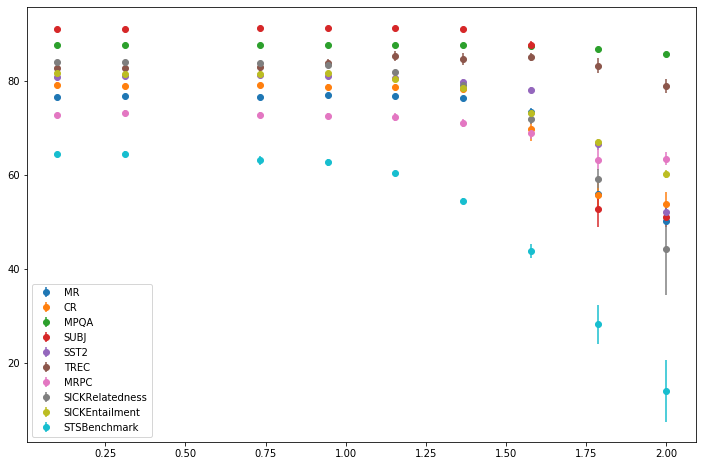

In [18]:
tasktestplot("../result/SR_leakly0_o1di")